<a href="https://colab.research.google.com/github/Adn02/Intro-to-ML/blob/main/Homework/HW2/HW2Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and Housing Dataset**

In [212]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/Adn02/Intro-to-ML/main/Datasets/Housing.csv"
hf = pd.read_csv(url)

**Pre-processing with Normalization/Standardization**

In [213]:
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

hf[variable_list] = hf[variable_list].apply(binary_mapping)
hf = hf.drop('furnishingstatus', axis=1)

np.random.seed(1)
df_training, df_validation = train_test_split(hf, train_size = 0.8, test_size = 0.2, random_state = 100)

# Three separate dataframes, df, normalized, and standardized
norm_training, norm_validation = df_training, df_validation
std_training, std_validation = df_training, df_validation

In [214]:
normalize = MinMaxScaler()
norm_training = normalize.fit_transform(norm_training)
norm_validation = normalize.fit_transform(norm_validation)

# Convert Normalized Training and Validation set back to dataframe for training model algorithm
norm_training = pd.DataFrame(norm_training, columns=df_training.columns)
norm_validation = pd.DataFrame(norm_validation, columns=df_validation.columns)

In [215]:
standardize = StandardScaler()
std_training = standardize.fit_transform(std_training)
std_validation = standardize.fit_transform(std_validation)

# Convert Standardized Training and Validation set back to dataframe for training model algorithm
std_training = pd.DataFrame(std_training, columns=df_training.columns)
std_validation = pd.DataFrame(std_validation, columns=df_validation.columns)

**Output Extraction**

In [216]:
# Non-feature scaled Outputs
y_train = df_training.pop('price')
y_valid = df_validation.pop('price')

# Normalized Outputs
norm_y_train = norm_training.pop('price')
norm_y_valid = norm_validation.pop('price')

# Standardized Outputs
std_y_train = std_training.pop('price')
std_y_valid = std_validation.pop('price')

**Training and Validation Algorithm with Parameters Penalty**

In [217]:
def train_model(inputs, x_training, x_validation, y_train, y_valid, learning_rate, lambd, iterations):
    training_inputs = x_training[inputs]
    x_train = np.c_[np.ones((len(training_inputs), 1)), training_inputs]

    validation_inputs = x_validation[inputs]
    x_valid = np.c_[np.ones((len(validation_inputs), 1)), validation_inputs]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_valid)
    theta = np.zeros(n)

    train_losses = []
    valid_losses = []

    for i in range(iterations):
        h_theta = x_train.dot(theta)
        error = np.subtract(h_theta, y_train)
        gradient = (1 / m_train) * (x_train.transpose().dot(error))

        #theta = theta - (learning_rate * gradient)  # Gradient Descent without Parameters Penalty
        theta = theta*(1 - learning_rate * (lambd / m_train)) - (learning_rate * gradient) # Gradient Descent with Parameters Penalty


        train_loss = 1 / (2 * m_train) * np.sum(np.square((h_theta - y_train)))
        valid_loss = 1 / (2 * m_valid) * np.sum(np.square((x_valid.dot(theta) - y_valid)))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

    return train_losses, valid_losses

**Problem 3 Part A**

In [218]:
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rate = [0.1, 0.05, 0.01]
lambd = 5
iterations = 500

# Training with normalized inputs
norm_train_losses1, norm_valid_losses1 = train_model(inputs, norm_training, norm_validation, y_train, y_valid, learning_rate[0], lambd, iterations)
norm_train_losses2, norm_valid_losses2 = train_model(inputs, norm_training, norm_validation, y_train, y_valid, learning_rate[1], lambd, iterations)
norm_train_losses3, norm_valid_losses3 = train_model(inputs, norm_training, norm_validation, y_train, y_valid, learning_rate[2], lambd, iterations)

# Training with standardized inputs
std_train_losses1, std_valid_losses1 = train_model(inputs, std_training, std_validation, y_train, y_valid, learning_rate[0], lambd, iterations)
std_train_losses2, std_valid_losses2 = train_model(inputs, std_training, std_validation, y_train, y_valid, learning_rate[1], lambd, iterations)
std_train_losses3, std_valid_losses3 = train_model(inputs, std_training, std_validation, y_train, y_valid, learning_rate[2], lambd, iterations)

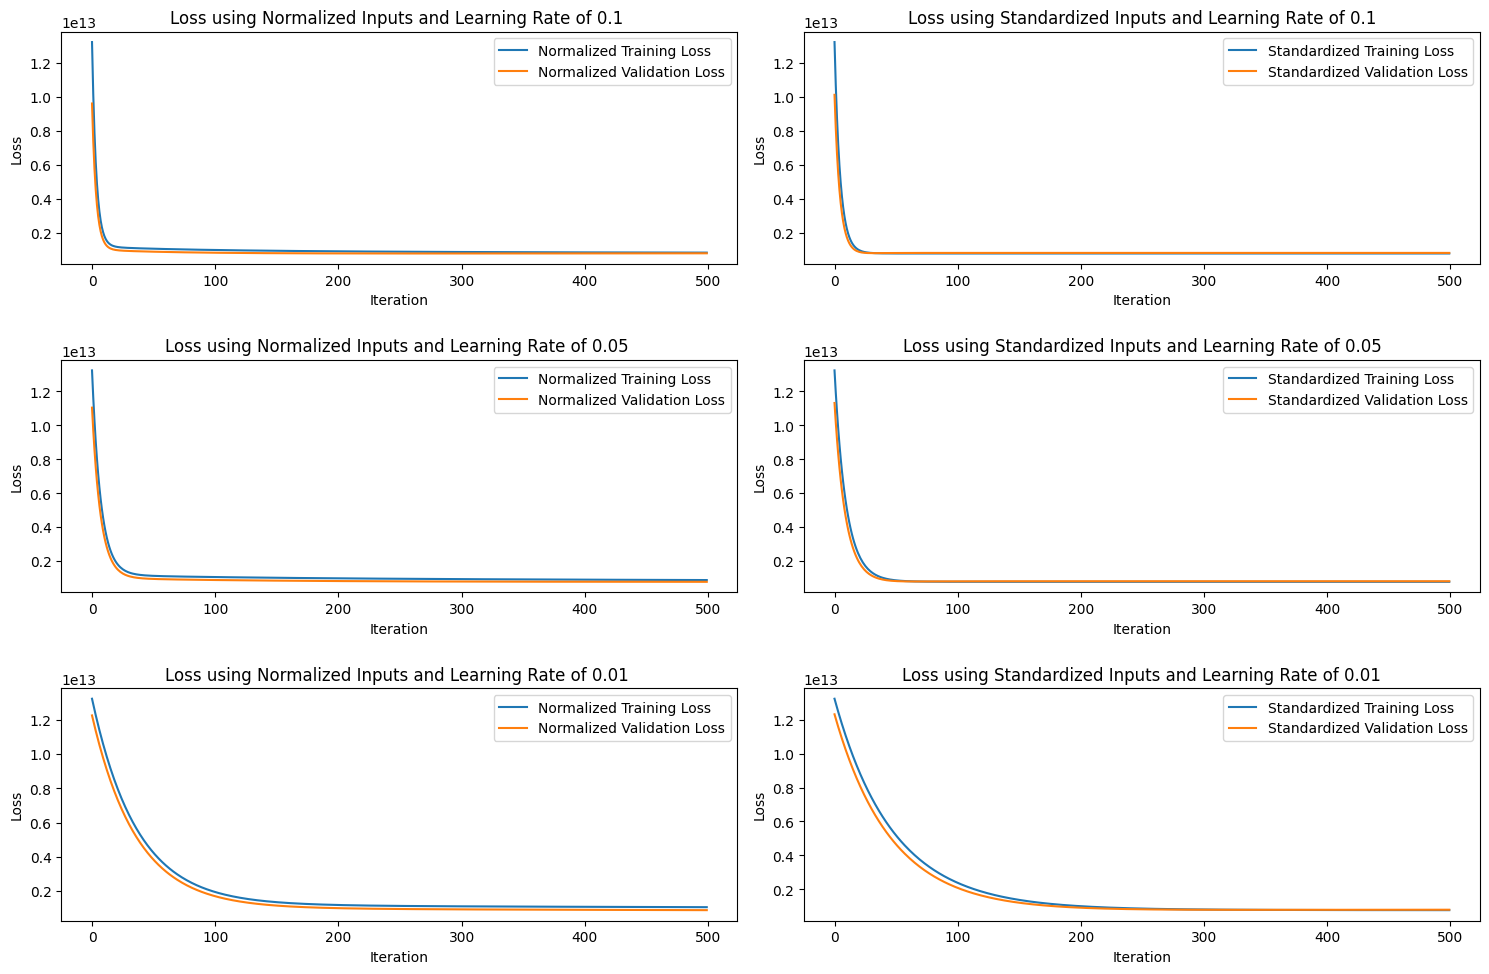

In [219]:
# Plot the losses
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.plot(norm_train_losses1, label="Normalized Training Loss")
plt.plot(norm_valid_losses1, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs and Learning Rate of 0.1 ")

plt.subplot(3, 2, 2)
plt.plot(std_train_losses1, label="Standardized Training Loss")
plt.plot(std_valid_losses1, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs and Learning Rate of 0.1")

# -------------------------------------------------------------------- #

plt.subplot(3, 2, 3)
plt.plot(norm_train_losses2, label="Normalized Training Loss")
plt.plot(norm_valid_losses2, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs and Learning Rate of 0.05 ")

plt.subplot(3, 2, 4)
plt.plot(std_train_losses2, label="Standardized Training Loss")
plt.plot(std_valid_losses2, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs and Learning Rate of 0.05")

# -------------------------------------------------------------------- #

plt.subplot(3, 2, 5)
plt.plot(norm_train_losses3, label="Normalized Training Loss")
plt.plot(norm_valid_losses3, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs and Learning Rate of 0.01 ")

plt.subplot(3, 2, 6)
plt.plot(std_train_losses3, label="Standardized Training Loss")
plt.plot(std_valid_losses3, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs and Learning Rate of 0.01")

plt.tight_layout()
plt.show()

**Problem 3 Part B**

In [220]:
inputs = norm_training.columns.tolist()
learning_rate = [0.1, 0.05, 0.01]
lambd = 5
iterations = 500

# Training with normalized inputs
norm_train_losses1, norm_valid_losses1 = train_model(inputs, norm_training, norm_validation, y_train, y_valid, learning_rate[0], lambd, iterations)
norm_train_losses2, norm_valid_losses2 = train_model(inputs, norm_training, norm_validation, y_train, y_valid, learning_rate[1], lambd, iterations)
norm_train_losses3, norm_valid_losses3 = train_model(inputs, norm_training, norm_validation, y_train, y_valid, learning_rate[2], lambd, iterations)

# Training with standardized inputs
std_train_losses1, std_valid_losses1 = train_model(inputs, std_training, std_validation, y_train, y_valid, learning_rate[0], lambd, iterations)
std_train_losses2, std_valid_losses2 = train_model(inputs, std_training, std_validation, y_train, y_valid, learning_rate[1], lambd, iterations)
std_train_losses3, std_valid_losses3 = train_model(inputs, std_training, std_validation, y_train, y_valid, learning_rate[2], lambd, iterations)

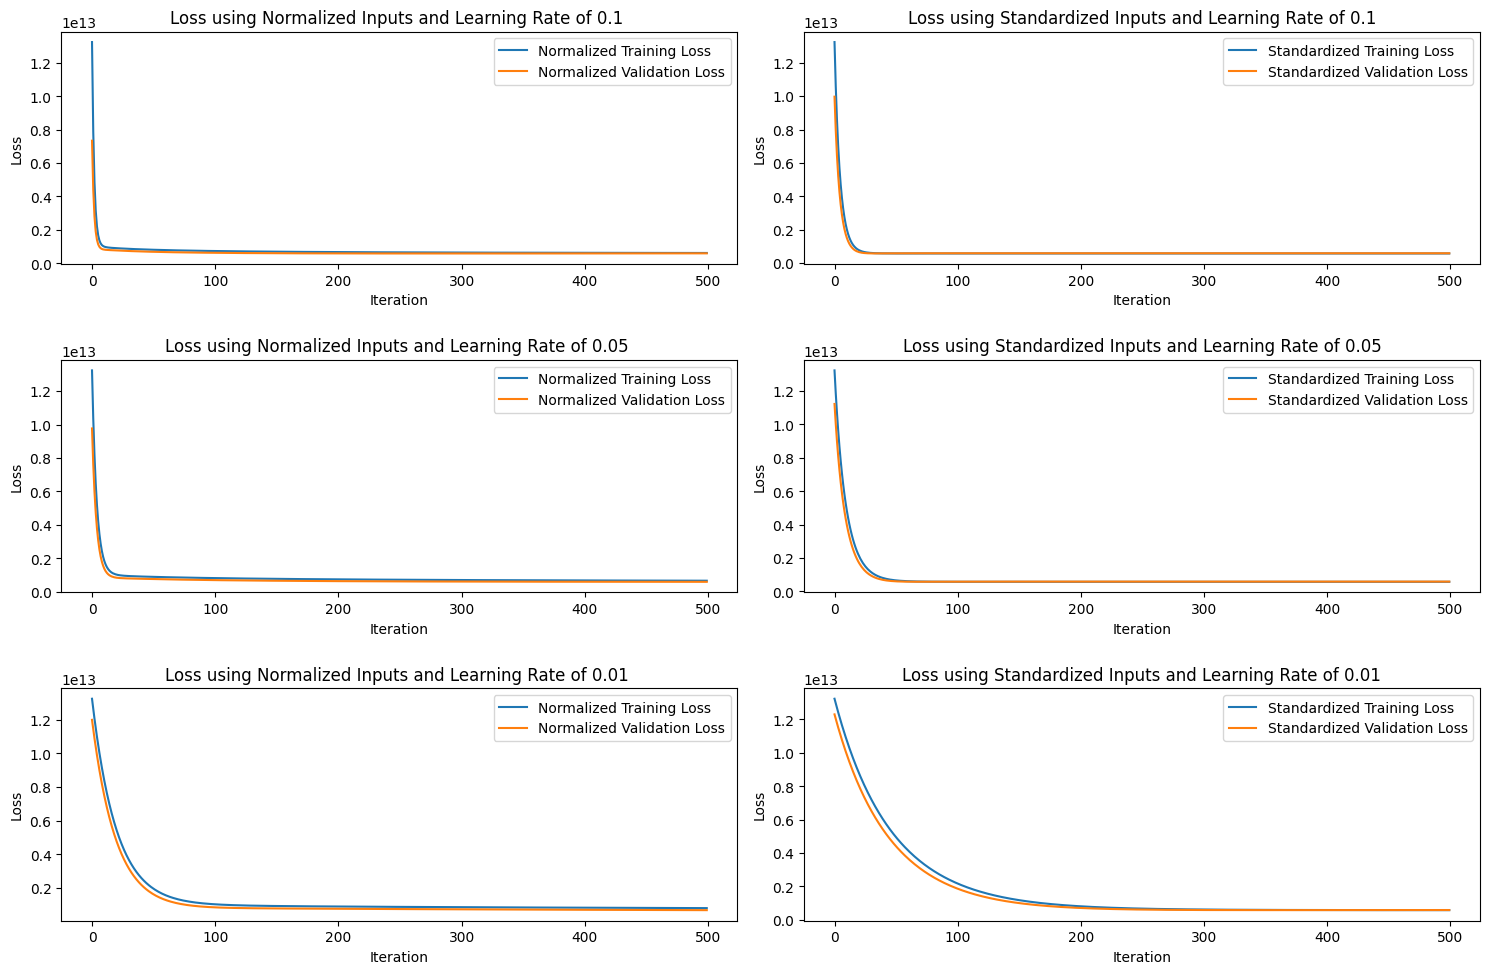

In [221]:
# Plot the losses
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.plot(norm_train_losses1, label="Normalized Training Loss")
plt.plot(norm_valid_losses1, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs and Learning Rate of 0.1 ")

plt.subplot(3, 2, 2)
plt.plot(std_train_losses1, label="Standardized Training Loss")
plt.plot(std_valid_losses1, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs and Learning Rate of 0.1")

# -------------------------------------------------------------------- #

plt.subplot(3, 2, 3)
plt.plot(norm_train_losses2, label="Normalized Training Loss")
plt.plot(norm_valid_losses2, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs and Learning Rate of 0.05 ")

plt.subplot(3, 2, 4)
plt.plot(std_train_losses2, label="Standardized Training Loss")
plt.plot(std_valid_losses2, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs and Learning Rate of 0.05")

# -------------------------------------------------------------------- #

plt.subplot(3, 2, 5)
plt.plot(norm_train_losses3, label="Normalized Training Loss")
plt.plot(norm_valid_losses3, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Normalized Inputs and Learning Rate of 0.01 ")

plt.subplot(3, 2, 6)
plt.plot(std_train_losses3, label="Standardized Training Loss")
plt.plot(std_valid_losses3, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss using Standardized Inputs and Learning Rate of 0.01")

plt.tight_layout()
plt.show()